In [1]:
#Questions that are related to the subject (i.e to data science)
#Questions that have not yet been asked
#Questions that do not have inappropriate content
#The homepage has links to jobs and company websites, as well as adds
#The job links could be useful
#When asked, how many times viewed, upvotes, tags, user

In [43]:
import pandas as pd

data = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"])
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [45]:
data.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [46]:
#FavoriteCount has 7432 NA values and only 1407 non-NA
#Tags column can help identify popular topics, but needs to be cleaned first
#Data types seem accurate

In [47]:
data.fillna(0, inplace = True)
data["FavoriteCount"] = data["FavoriteCount"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [48]:
def clean_tags(x):
    new_str = x.replace("><",",")
    new_str = new_str.replace("<","")
    new_str = new_str.replace(">","")
    return new_str

data["Tags"] = data["Tags"].apply(clean_tags)

In [93]:
def split_tags(x):
    return x.split(",")

Tag_rows = data["Tags"].apply(split_tags)

tag_list = []
for i in Tag_rows:
    for j in range(len(i)):
        tag_list.append(i[j])
    
n_tag_used = pd.Series(tag_list).value_counts()
Tags = pd.DataFrame(data = n_tag_used, columns = ["Used"])

,Used
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [115]:
views = 0
Tags["Views"] = 0
for i in Tags.index:   
    for j in range(len(data)):
        if i in data["Tags"][j]:
            views = views + data["ViewCount"][j]
    Tags["Views"][i] = views
    views = 0

398666
541691
233628
185367
269051
158453
121369
128110
71396
73165
64134
74615
201787
79081
43158
1290977
16949
33928
19465
22753
31056
261458
33238
29128
20101
23209
18978
40363
31533
16384
23160
15780
27529
18370
17946
18215
20613
19733
13928
20995
15364
18953
14316
8823
32502
27342
18632
49767
14036
14292
12598
13943
15676
14575
9670
15092
12918
10992
9734
13222
15233
15979
12795
10873
13885
6387
8797
18872
13013
89352
15448
9403
25968
7255
17855
16952
11739
10413
6021
11455
13070
8107
8577
7302
9958
28874
4410
6603
5714
7717
6911
3604
4000
18998
4941
4742
6544
8173
4947
2715
16305
11389
20612
13121
9711
8638
10972
5694
22900
8996
5734
8506
21299
6899
5329
3945
20927
32244
5004
3866
3621
9030
3315
3506
6928
3795
3669
10523
5487
4598
15019
5376
3153
51044
2160
2114
3996
2352
1283
4707
2198
4913
2686
1544
7218
2737
38654
2215
5893
1429
1818
3451
8261
2281
1996
15165
2231
2245
5527
2591
8756
2195
29827
13916
16920
3585
906
3306
3861
3303
5344
12026
1126
3735
1014
5550
2665
2643
3183
1

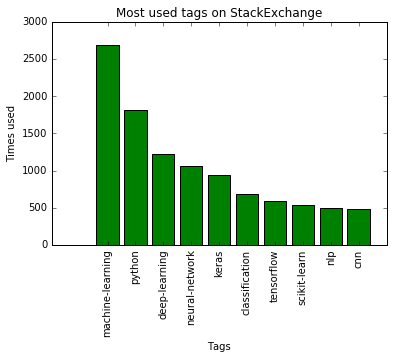

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

top_used = Tags.sort_values("Used", ascending = False).head(10)

x = top_used.index
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, top_used["Used"], color='green', align = "center")
plt.xlabel("Tags")
plt.ylabel("Times used")
plt.title("Most used tags on StackExchange")

plt.xticks(x_pos, x, rotation = 90)

plt.show()

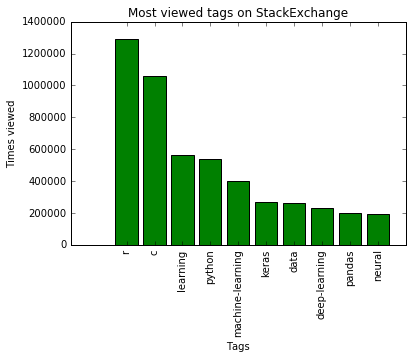

In [143]:
top_views = Tags.sort_values("Views", ascending = False).head(10)

x = top_views.index
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, top_views["Views"], color='green', align = "center")
plt.xlabel("Tags")
plt.ylabel("Times viewed")
plt.title("Most viewed tags on StackExchange")

plt.xticks(x_pos, x, rotation = 90)

plt.show()

In [145]:
#Finding relationships between tags:
#are the tags used in the same question
#do the tags have a similar amount of FavoriteCounts

In [146]:
#most popular tags relate to machine learning and AI applications
#some tags are python packages and are so related to python programming

In [149]:
all_questions = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [153]:
all_questions["Tags"] = all_questions["Tags"].apply(clean_tags)
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability"
1,45418,2019-02-12 00:50:39,neural-network
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot"
3,45426,2019-02-12 04:51:49,keras
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s..."


In [157]:
def is_DL(x):
    if "deep-learning" in x:
        return 1
    else:
        return 0
    
all_questions["Deep Learning"] = all_questions["Tags"].apply(is_DL)

In [207]:
def year_month(x):
    year = str(x.year)
    month = str(x.month)
    return year + "-" + month

all_questions["yearmonth"] = all_questions["CreationDate"].apply(year_month)
all_questions["yearmonth"] = all_questions["yearmonth"].astype(str)

In [208]:
dl_counts = all_questions.groupby("yearmonth")["Deep Learning"].agg(["sum","count"])
dl_counts["DL pct"] = round(dl_counts["sum"]/dl_counts["count"]*100,2)
dl_counts

,sum,count,DL pct
yearmonth,,,
2014-10,1,71,1.41
2014-11,1,64,1.56
2014-12,4,81,4.94
2014-5,0,58,0.00
2014-6,1,99,1.01
2014-7,1,76,1.32
2014-8,0,65,0.00
2014-9,0,48,0.00
2015-1,0,63,0.00


In [209]:
dl_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2014-10 to 2020-1
Data columns (total 3 columns):
sum       69 non-null int64
count     69 non-null int64
DL pct    69 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.2+ KB


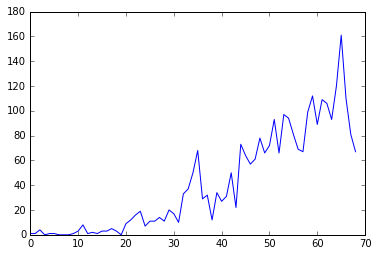

In [227]:
y1 = dl_counts["sum"].values
y2 = dl_counts["count"].values
y3 = dl_counts["DL pct"].values

xpos = range(len(dl_counts)) 

plt.plot(y1)
#plt.xticks(xpos, dl_counts.index.values, rotation = 90)
#plt.show()

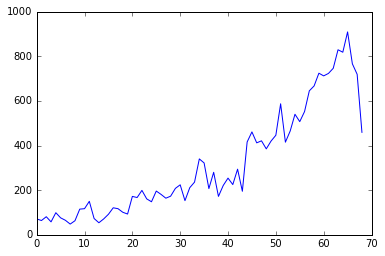

In [221]:
plt.plot(y2)

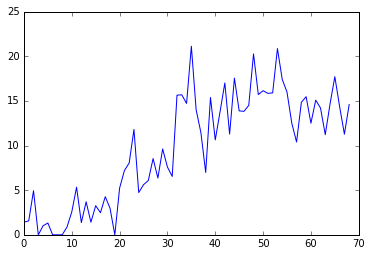

In [222]:
plt.plot(y3)

In [ ]:
#the interest in deep learning has been steadily increasing, although it appears to have peaked and has plateaued slightly